In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import roc_auc_score


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
math_data = pd.read_csv("math_success.csv")
portuguese_data = pd.read_csv("portuguese_success.csv")

math_df = pd.DataFrame(math_data)
portuguese_df = pd.DataFrame(portuguese_data)

In [3]:
math_df.columns.to_list()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences',
 'g1',
 'g2',
 'g3']

In [4]:
math_df.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
portuguese_df.describe()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
# Calculate the average of "G1" and "G2" features
average_MIDGRADE = (math_df['g1'] + math_df['g2']) / 2

# Round the average values to the nearest integer
rounded_MIDGRADE = np.where(average_MIDGRADE - np.floor(average_MIDGRADE) >= 0.5, np.ceil(average_MIDGRADE), np.floor(average_MIDGRADE))

# Create a new feature 'midgrade'
math_df['MIDGRADE'] = rounded_MIDGRADE.astype(int)

In [7]:
math_df["MidGradePassed"] = np.where(math_df["MIDGRADE"] >= 10, 'passed', 'fail')

In [8]:
math_df["MIDGRADE"] = math_df["MIDGRADE"].astype(int)
math_df["MIDGRADEpass_fail"] = (math_df["MIDGRADE"] >= 10).astype(int)

In [9]:
math_df["g3"] = math_df["g3"].astype(int)
math_df["pass_fail"] = (math_df["g3"] >= 10).astype(int)

In [10]:

#math_df["finalGradePassed"] = np.where(math_df["g3"] >= 10, 'passed', 'fail')


In [11]:
math_df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,walc,health,absences,g1,g2,g3,MIDGRADE,MidGradePassed,MIDGRADEpass_fail,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,6,fail,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5,fail,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,10,7,8,10,8,fail,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,2,15,14,15,15,passed,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,4,6,10,10,8,fail,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,11,9,9,9,9,fail,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,3,14,16,16,15,passed,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,10,8,7,9,fail,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,0,11,12,10,12,passed,1,1


In [12]:
math_df['MIDGRADEpass_fail'].value_counts()

MIDGRADEpass_fail
1    255
0    140
Name: count, dtype: int64

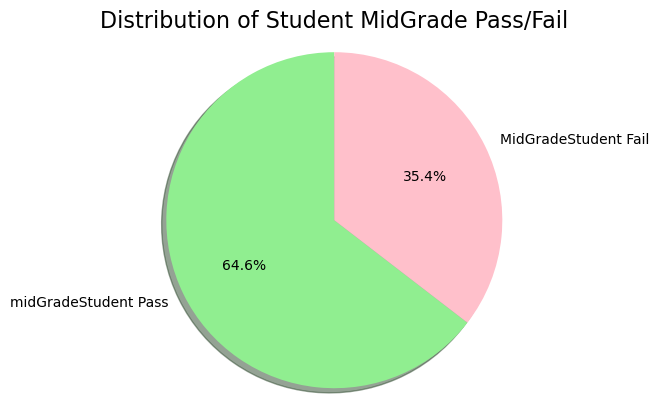

In [13]:
pass_count = 255
fail_count = 140

# Calculate percentages
total_students = pass_count + fail_count
pass_percentage = (pass_count / total_students) * 100
fail_percentage = (fail_count / total_students) * 100

# Labels and sizes
labels = 'midGradeStudent Pass', 'MidGradeStudent Fail'
sizes = [pass_percentage, fail_percentage]
colors = ['lightgreen', 'pink']

# Create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Student MidGrade Pass/Fail', fontsize=16)
plt.show()

In [14]:
#plot of student status
math_df['pass_fail'].value_counts()

pass_fail
1    265
0    130
Name: count, dtype: int64

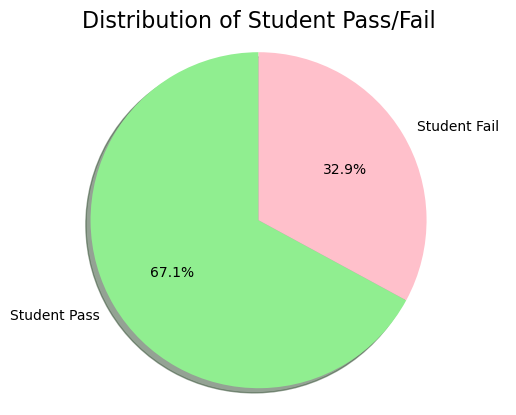

In [15]:

pass_count = 265
fail_count = 130

# Calculate percentages
total_students = pass_count + fail_count
pass_percentage = (pass_count / total_students) * 100
fail_percentage = (fail_count / total_students) * 100

# Labels and sizes
labels = 'Student Pass', 'Student Fail'
sizes = [pass_percentage, fail_percentage]
colors = ['lightgreen', 'pink']

# Create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Student Pass/Fail', fontsize=16)
plt.show()

In [16]:
math_df = math_df.drop(columns = ["g3","g1","g2","MIDGRADE"])

In [17]:
math_df

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,MidGradePassed,MIDGRADEpass_fail,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,fail,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,fail,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,fail,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,passed,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,fail,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,fail,0,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,passed,1,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,fail,0,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,passed,1,1


In [18]:
math_df = pd.get_dummies(math_df)

Text(0.5, 1.0, 'Correlation Heatmap')

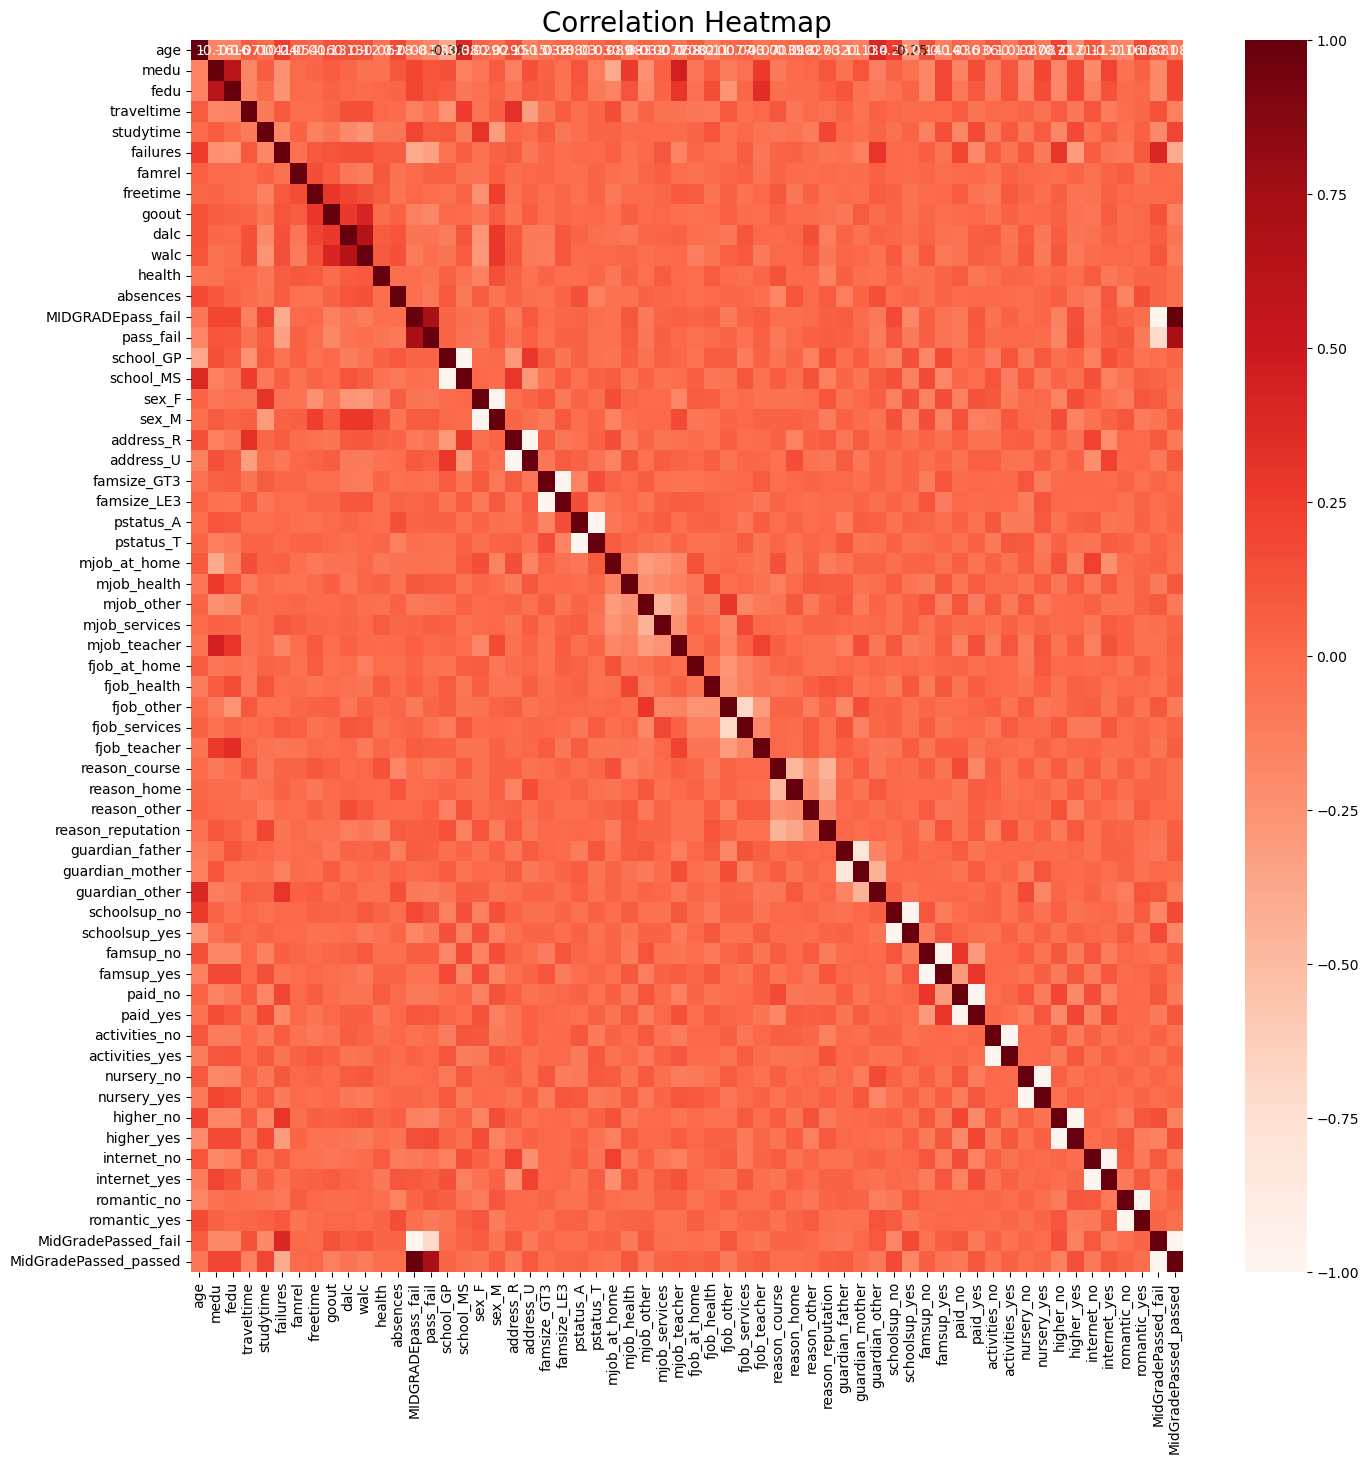

In [19]:
# View the correlation between variables correlation heatmap
corr = math_df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

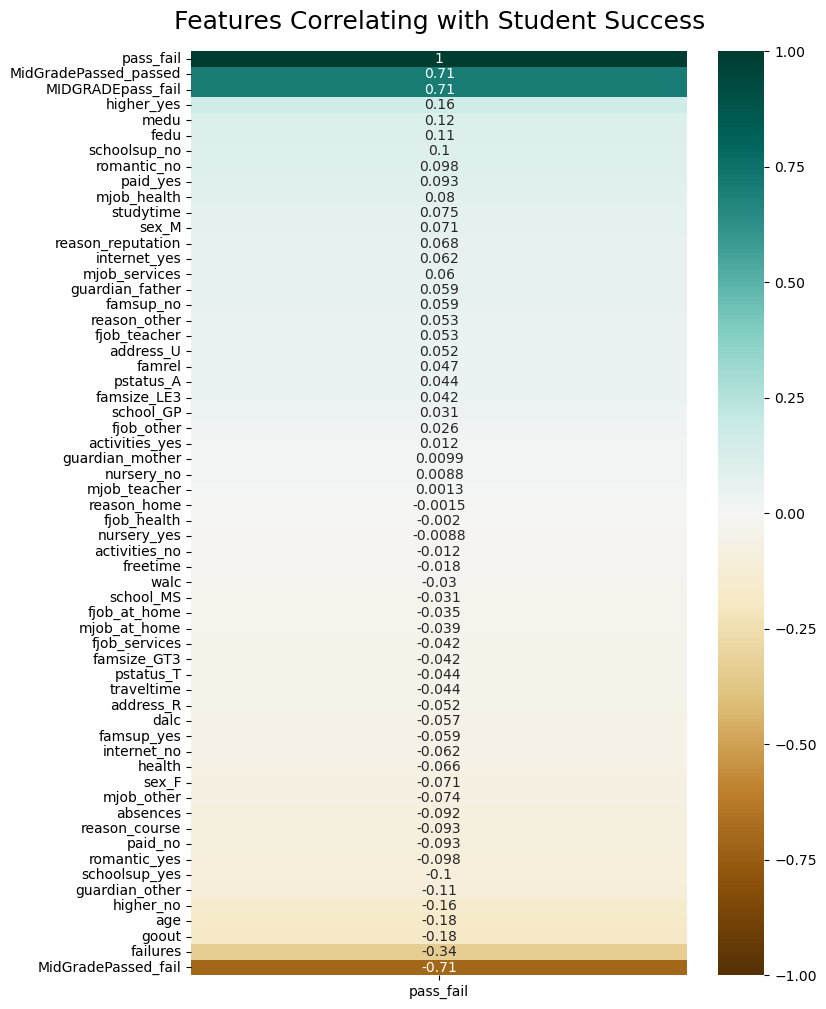

In [20]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(math_df.corr()[['pass_fail']].sort_values(by='pass_fail', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Student Success', fontdict={'fontsize':18}, pad=16);

Text(0.5, 0, 'Student status')

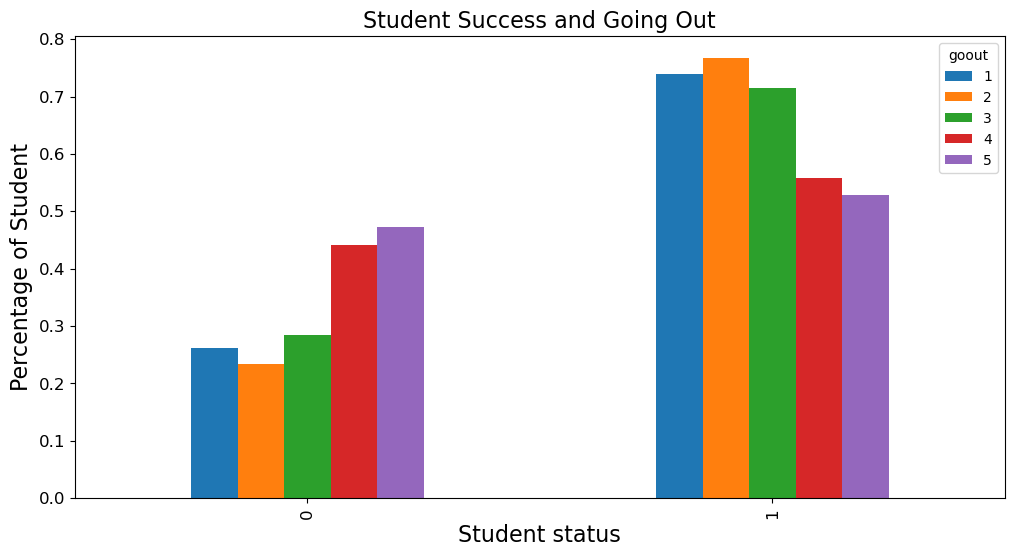

In [21]:
# Studnet Math Success and going out
perc = (lambda col: col/col.sum())
index = [0,1]
out_tab = pd.crosstab(index=math_df.pass_fail, columns=math_df.goout)
out_perc = out_tab.apply(perc).reindex(index)
out_perc.plot.bar( fontsize=12, figsize=(12,6))
plt.title('Student Success and Going Out', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Student status', fontsize=16)

<Figure size 640x480 with 0 Axes>

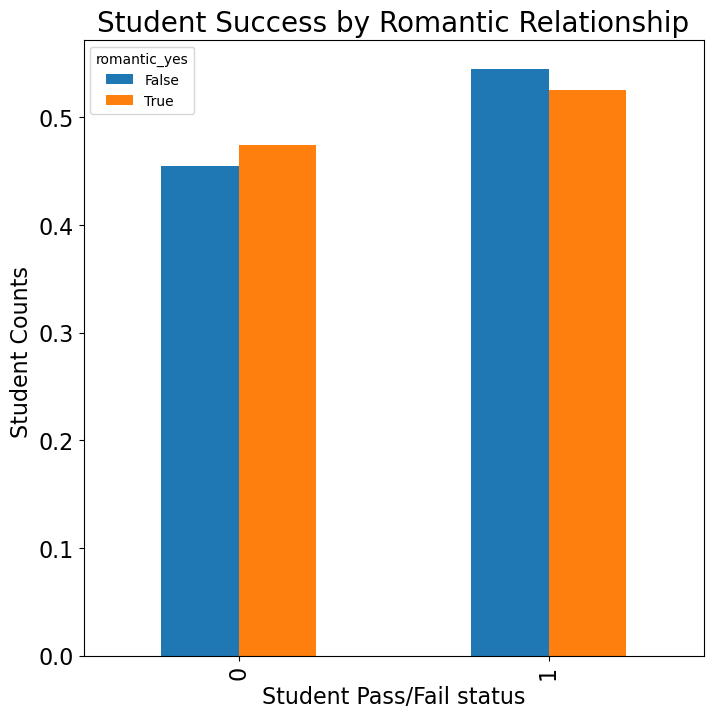

In [22]:
# Success and romantic relationship status
perc = (lambda col: col/col.sum())
index = [0,1]
romance_tab1 = pd.crosstab(index=math_df.pass_fail, columns=math_df.romantic_yes)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)
plt.figure()
romance_perc.plot.bar( fontsize=16, figsize=(8,8))
plt.title('Student Success by Romantic Relationship', fontsize=20)
plt.ylabel('Student Counts ', fontsize=16)
plt.xlabel('Student Pass/Fail status', fontsize=16)
plt.show()


Text(0, 0.5, 'Percentage of Student')

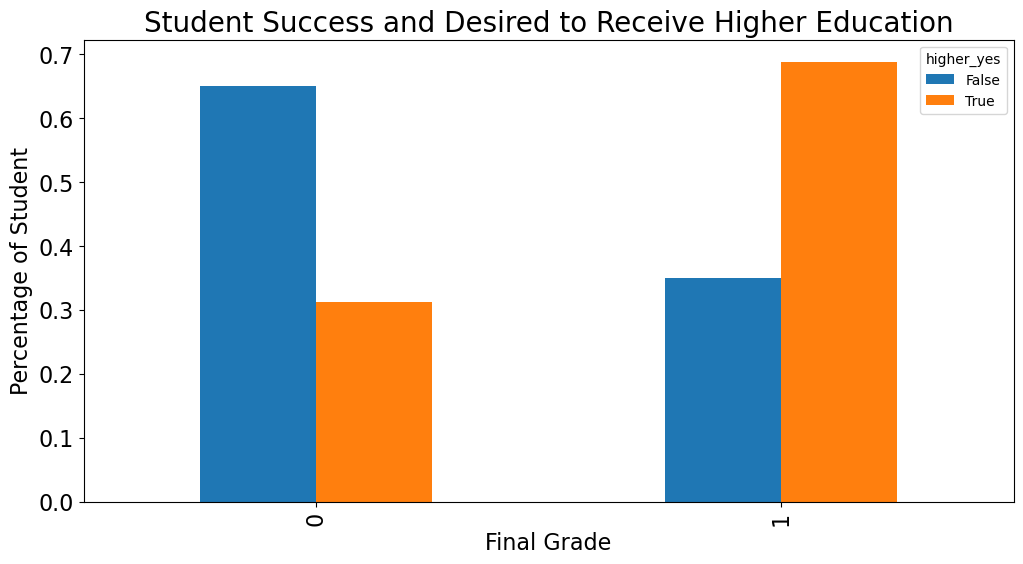

In [23]:
higher_tab = pd.crosstab(index=math_df.pass_fail, columns=math_df.higher_yes)
higher_perc = higher_tab.apply(perc).reindex(index)
higher_perc.plot.bar(figsize=(12,6), fontsize=16)
plt.title('Student Success and Desired to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

C:\Users\katea\AppData\Local\Temp\ipykernel_22808\2195789295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_MIDGRADEpass_fail'] = good.MIDGRADEpass_fail
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\2195789295.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_MIDGRADEpass_fail'] = poor.MIDGRADEpass_fail
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\2195789295.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wi

Text(0.5, 0, 'MIDGRADEpass_fail')

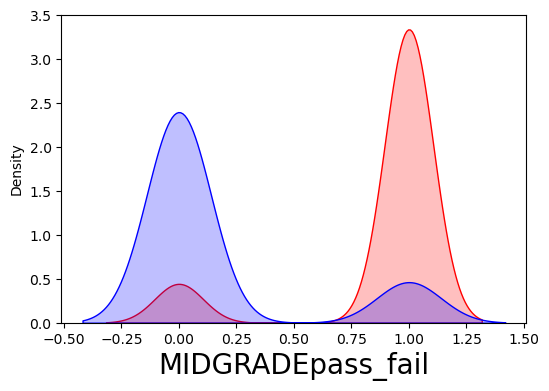

In [24]:
#Midgrade:
good = math_df.loc[math_df.pass_fail==1]
poor=math_df.loc[math_df.pass_fail==0]
good['good_student_MIDGRADEpass_fail'] = good.MIDGRADEpass_fail
poor['poor_student_MIDGRADEpass_fail'] = poor.MIDGRADEpass_fail
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_MIDGRADEpass_fail'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_MIDGRADEpass_fail'], shade=True, color="b")#poor_student in blue
plt.xlabel('MIDGRADEpass_fail', fontsize=20)

C:\Users\katea\AppData\Local\Temp\ipykernel_22808\678552505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_mother_education'] = good.medu
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\678552505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_mother_education'] = poor.medu
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\678552505.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v

Text(0.5, 0, 'Mother Education Level')

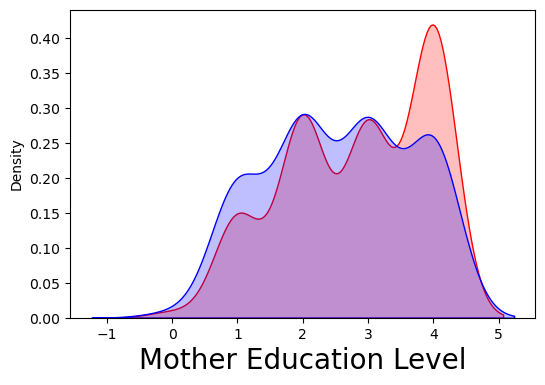

In [25]:
#Mother education:
good = math_df.loc[math_df.pass_fail==1]
poor=math_df.loc[math_df.pass_fail==0]
good['good_student_mother_education'] = good.medu
poor['poor_student_mother_education'] = poor.medu
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")#poor_student in blue
plt.xlabel('Mother Education Level', fontsize=20)

In [26]:
print(math_df.columns)

Index(['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'dalc', 'walc', 'health', 'absences',
       'MIDGRADEpass_fail', 'pass_fail', 'school_GP', 'school_MS', 'sex_F',
       'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'pstatus_A', 'pstatus_T', 'mjob_at_home', 'mjob_health', 'mjob_other',
       'mjob_services', 'mjob_teacher', 'fjob_at_home', 'fjob_health',
       'fjob_other', 'fjob_services', 'fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'MidGradePassed_fail', 'MidGradePassed_passed'],
      dtype='object')


C:\Users\katea\AppData\Local\Temp\ipykernel_22808\4047942624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_student_father_education'] = good.fedu
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\4047942624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_student_father_education'] = poor.fedu
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\4047942624.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seabor

Text(0.5, 0, 'Father Education Level')

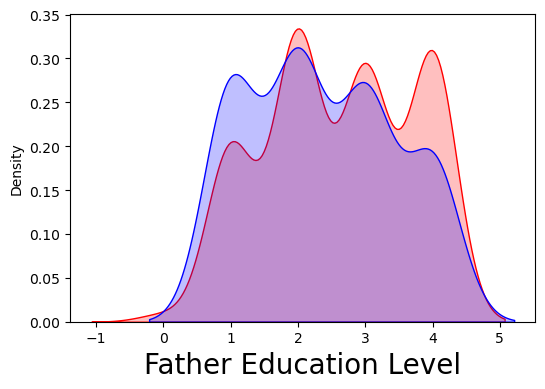

In [27]:
#Father education:
good = math_df.loc[math_df.pass_fail==1]
poor=math_df.loc[math_df.pass_fail==0]
good['good_student_father_education'] = good.fedu
poor['poor_student_father_education'] = poor.fedu
plt.figure(figsize=(6,4))
p=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")#good_student in red
p=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")#poor_student in blue
plt.xlabel('Father Education Level', fontsize=20)

C:\Users\katea\AppData\Local\Temp\ipykernel_22808\2596175824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['good_alcohol_usage']=good.walc
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\2596175824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poor['poor_alcohol_usage']=poor.walc
C:\Users\katea\AppData\Local\Temp\ipykernel_22808\2596175824.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update y

Text(0.5, 0, 'Level of Alcohol Consumption')

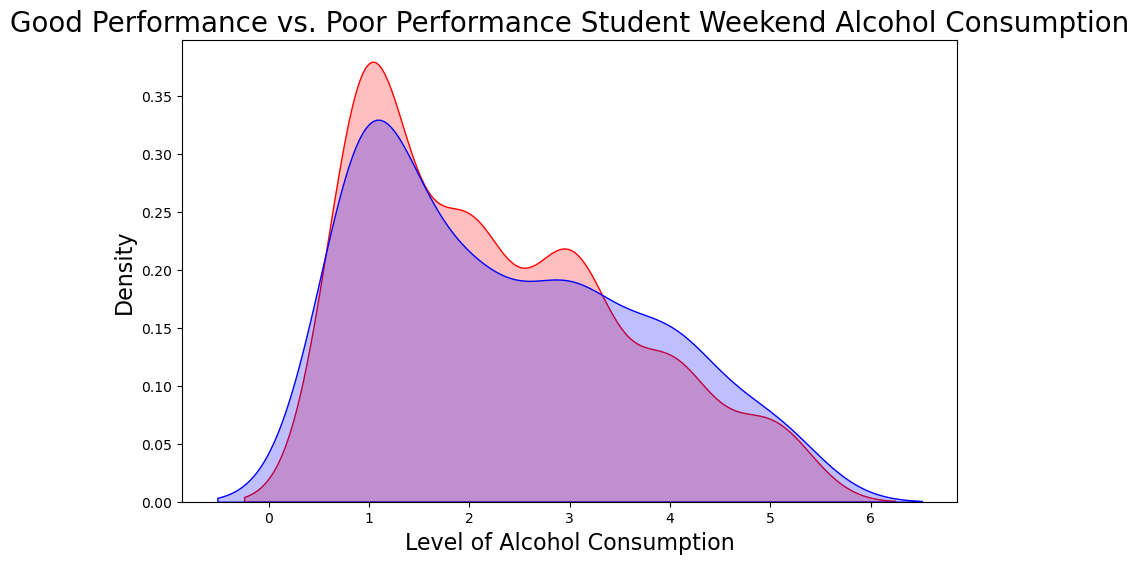

In [28]:
# weekend alcohol consumption
# create good student dataframe
good = math_df.loc[math_df.pass_fail == 1]
good['good_alcohol_usage']=good.walc
# create poor student dataframe
poor = math_df.loc[math_df.pass_fail == 0]
poor['poor_alcohol_usage']=poor.walc
plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

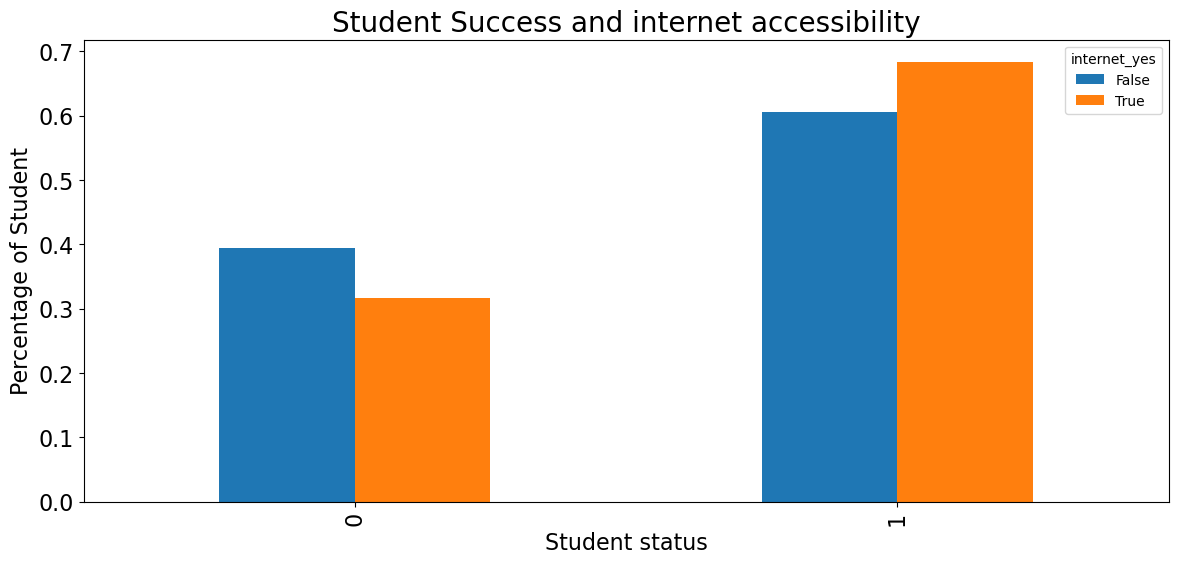

In [29]:
int_tab = pd.crosstab(index=math_df.pass_fail, columns=math_df.internet_yes)
int_perc = int_tab.apply(perc).reindex(index)
int_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Student Success and internet accessibility', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

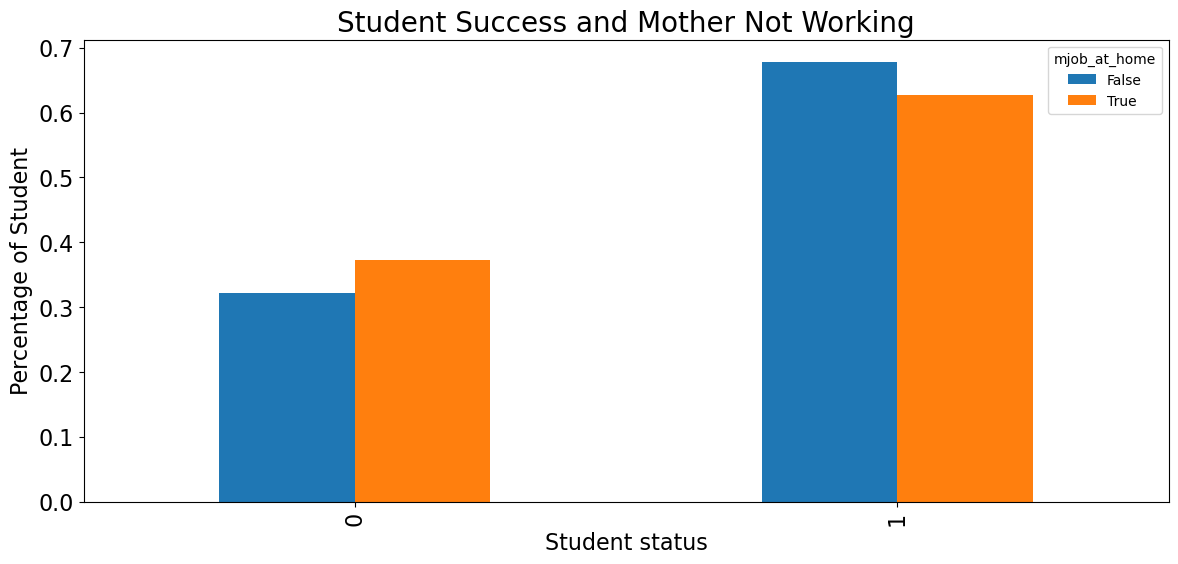

In [30]:
hmot_tab = pd.crosstab(index=math_df.pass_fail, columns=math_df.mjob_at_home)
hmot_perc = hmot_tab.apply(perc).reindex(index)
hmot_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Student Success and Mother Not Working', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

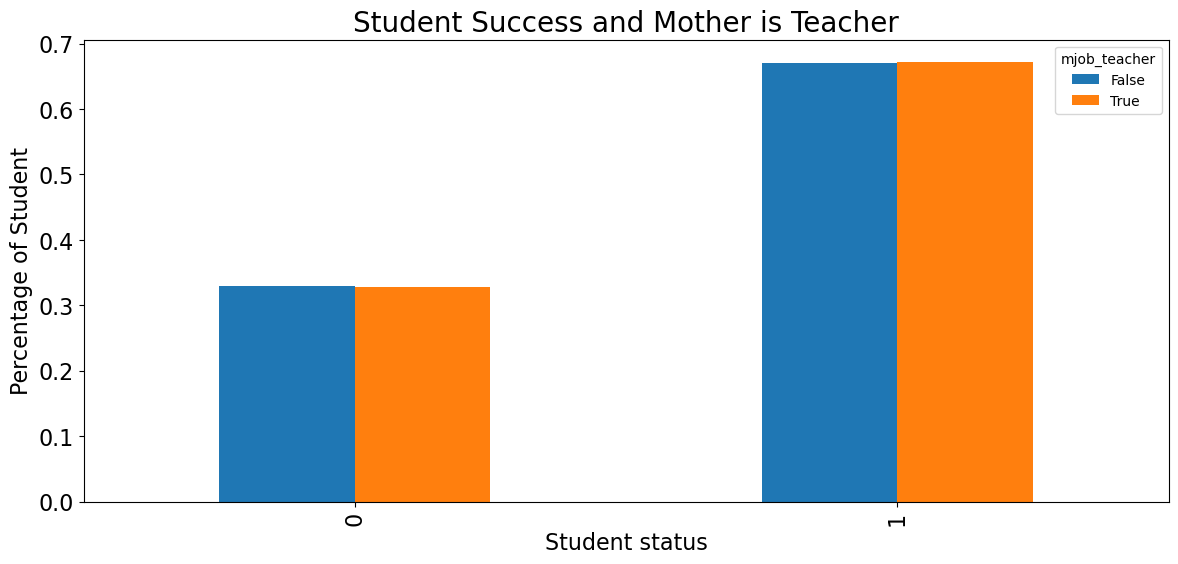

In [35]:
hmot_tab = pd.crosstab(index=math_df.pass_fail, columns=math_df.mjob_teacher)
hmot_perc = hmot_tab.apply(perc).reindex(index)
hmot_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Student Success and Mother is Teacher', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

Text(0, 0.5, 'Percentage of Student')

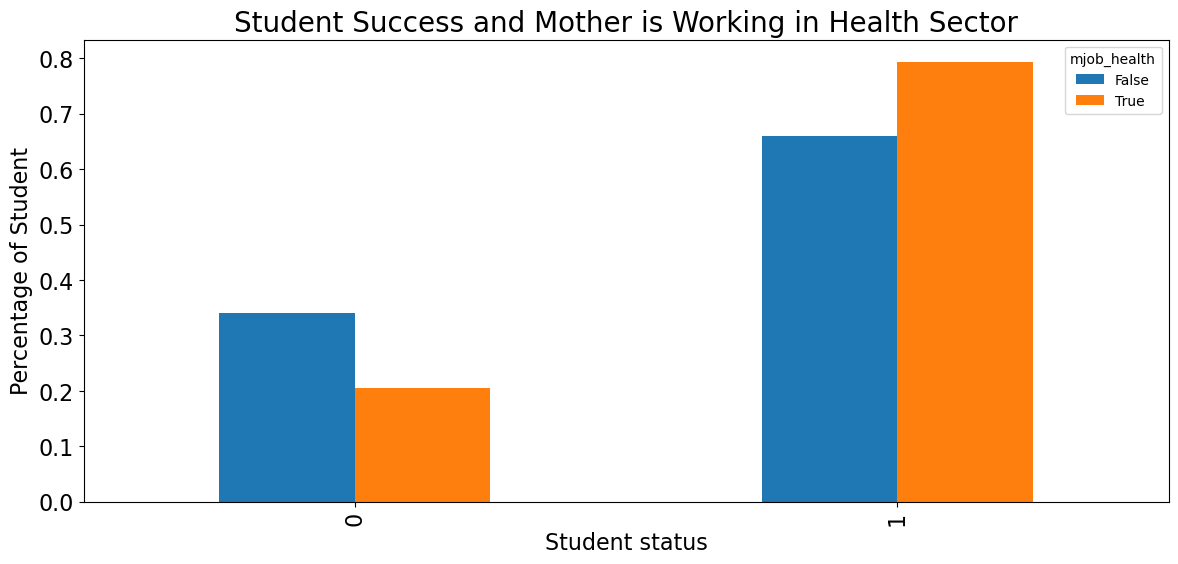

In [34]:
hmot_tab = pd.crosstab(index=math_df.pass_fail, columns=math_df.mjob_health)
hmot_perc = hmot_tab.apply(perc).reindex(index)
hmot_perc.plot.bar(figsize=(14,6), fontsize=16)
plt.title('Student Success and Mother is Working in Health Sector', fontsize=20)
plt.xlabel('Student status', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)